In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [4]:
df = pd.read_csv(r"C:\Users\sahil\Downloads\weight-height.csv")# to read csv file
df = df.drop("Gender",axis=1)  # to remove column

In [5]:
#df.head() 
df.head(10)

,Weight,Height
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971110
8,67.018950,175.929440
9,63.456494,156.399676


Text(0, 0.5, 'Weight')

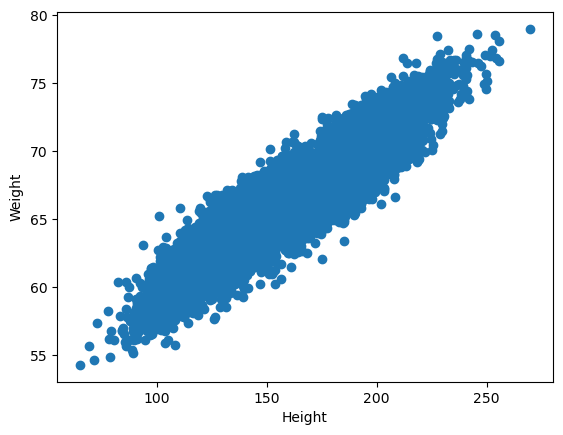

In [6]:
# Scatter plot
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')

In [7]:
## Correlation 
df.corr()

,Weight,Height
Weight,1.000000,0.924756
Height,0.924756,1.000000


c:\Users\sahil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


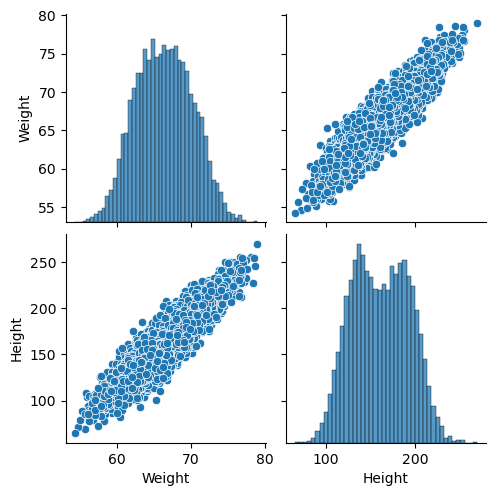

In [8]:
#Seaborn for visualizatiob 
import seaborn as sns 
sns.pairplot(df)

In [9]:
"""as we can see in above graph height and weight are linearly coorealted 
since it shows linear graph """

'as we can see in above graph height and weight are linearly coorealted \nsince it shows linear graph '

In [10]:
#independent and dependent feature 
""" most of the machine learning modelslike Scikit Learn expects input as 2D array """
X =df[['Weight']] #indpendent feature should be dataframe or 2 dimensional array as
Y = df["Height"]  # dependent variable can be in series or 1D array 
np.array(X).shape

(10000, 1)

In [11]:
np.array(X)

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [12]:
"""it is not compatible for liabraries like scikit-learn"""
X_series=df['Weight']   
np.array(X_series).shape

(10000,)

In [13]:
type(X)

pandas.core.frame.DataFrame

In [14]:
type(df)

pandas.core.frame.DataFrame

In [15]:
## Train Test Split 
from sklearn.model_selection import train_test_split  # Use to split data into train and test data 

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [17]:
X_train.shape

(7500, 1)

In [ ]:
## Standardization
#!pip install module_name
from sklearn.preprocessing import StandardScaler


In [19]:
# interview question : - Why we need to fit_transform?
"""to prevent data leckage"""
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train) 

In [20]:
"""The X_test = scaler.transform(X_test) ensures that 
the test data is preprocessed in the same way as the training data,
without introducing bias from the test set into the model."""
X_test=scaler.transform(X_test) 

In [21]:
X_test

array([[ 0.60863475],
       [ 0.64561305],
       [ 0.01295416],
       ...,
       [-1.48363282],
       [ 0.20143303],
       [ 0.32447927]])

In [22]:
## Apply Simple linear Regression
from sklearn.linear_model import LinearRegression

In [23]:
regression = LinearRegression()

In [24]:
#regression.fit(X_series,Y)  # it is showing error like expected 2D array got 1D array since scikit learn deals with 2D array only

In [25]:
regression.fit(X_train,Y_train)

LinearRegression()

In [26]:
print("coefficient or slope",regression.coef_) # it provides single slope as best fit line as only one ind feature
print("Intercept",regression.intercept_) #it provides intercept 

coefficient or slope [29.59862269]
Intercept 161.23075926318265


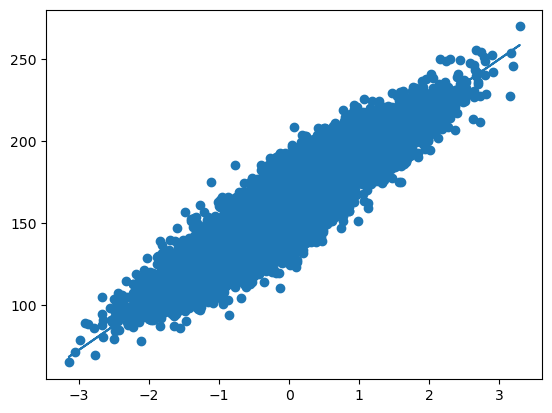

In [27]:
"""plot the best fit line of training data """
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

## Prediction of test data
1) predicted height output = intercept + coef_(Weights)
2) y_predict =  66.3483 + 3.5520(X_test)

In [28]:
## prediction for test data
Y_predict = regression.predict(X_test)

In [ ]:
## Performance Matrices :
from sklearn.metrics import mean_absolute_error, mean_squared_error

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [30]:
mse = mean_squared_error(Y_test,Y_predict)
mae = mean_absolute_error(Y_test,Y_predict)
rmse =np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

149.31479307438
9.720990891992406
12.21944323913246


### R square
Formula

**R^2 = 1 - SSR/SST**

R^2 = coefficient of determination   
SSR = sum of squares of residuals   
SST = total sum of squares  

In [31]:
from sklearn.metrics import r2_score

In [32]:
score = r2_score(Y_test,Y_predict)
print(score)

0.8573532043041168


### Adjusted R Square
**Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]**  

where  
R2: the R2v of the model   
n: the no of observations   
k: the no of predictor variables  

In [33]:
# Displat adjusted R-squared
1 - (1 - score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.8572960999023169

# OLS linear regression

In [34]:
import statsmodels.api as sm 

In [35]:
model=sm.OLS(Y_train,X_train).fit()

In [36]:
prediction =model.predict(X_test)
print (prediction )

[ 18.01475046  19.10925704   0.38342516 ... -43.91348812   5.96214028
   9.60413949]


In [37]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):              0.032
Method:                 Least Squares   F-statistic:                              251.3
Date:                Fri, 23 May 2025   Prob (F-statistic):                    1.09e-55
Time:                        19:19:03   Log-Likelihood:                         -48785.
No. Observations:                7500   AIC:                                  9.757e+04
Df Residuals:                    7499   BIC:                                  9.758e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [38]:
## Prediction for new data 
regression.predict([[72]])
#output : 322.097 height for person having weight 72 
# which is insane is happened due to standardization or normalization

array([2292.33159316])

In [39]:
# Prediction for new data 
regression.predict(scaler.transform([[72]]))

c:\Users\sahil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([204.76138474])